In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

In [2]:
data=pd.read_csv("Diwali_Sales_Data.csv",encoding= 'unicode_escape')

data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
## Remove all null value columns 
data=data.drop(["Status","unnamed1"],axis=1)
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0


In [4]:
## Basic Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [5]:
## Basic Description of Data
pd.DataFrame(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
User_ID,11251.0,1.003004e+06,1716.125402,1000001.0,1001492.0,1003065.0,1004430.0,1006040.0
Age,11251.0,3.542121e+01,12.754122,12.0,27.0,33.0,43.0,92.0
Orders,11251.0,2.489290e+00,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355869,188.0,5443.0,8109.0,12675.0,23952.0


In [6]:

## Remove count column
pd.DataFrame(data.describe()).T.drop(columns="count")

,mean,std,min,25%,50%,75%,max
User_ID,1.003004e+06,1716.125402,1000001.0,1001492.0,1003065.0,1004430.0,1006040.0
Age,3.542121e+01,12.754122,12.0,27.0,33.0,43.0,92.0
Orders,2.489290e+00,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,9.453611e+03,5222.355869,188.0,5443.0,8109.0,12675.0,23952.0


In [7]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Found Discrepancies from column 

In [8]:

data["Cust_name"].unique()

array(['Sanskriti', 'Kartik', 'Bindu', ..., 'Chris', 'Madan Mohan',
       'Nicole'], dtype=object)

In [9]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [10]:
data["State"].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [11]:
## Replacing wrongly spelled name 
data["State"]=data.State.replace("Andhra\xa0Pradesh","Andhra Pradesh")

In [12]:
data["State"].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [13]:
data["Zone"].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [14]:
data["Occupation"].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'IT Sector', 'Media', 'Banking',
       'Retail', 'Hospitality', 'Aviation', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

In [15]:
data.duplicated("Product_ID").sum()

8900

In [16]:
data.duplicated("User_ID").sum()

7496

In [17]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
data=data.dropna(subset=["Amount"])

In [19]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## EDA

In [20]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [53]:
## No. of Males and Females
g=data.groupby("Gender")["Gender"].count()
g

Gender
F    7832
M    3407
Name: Gender, dtype: int64

<Axes: xlabel='Gender'>

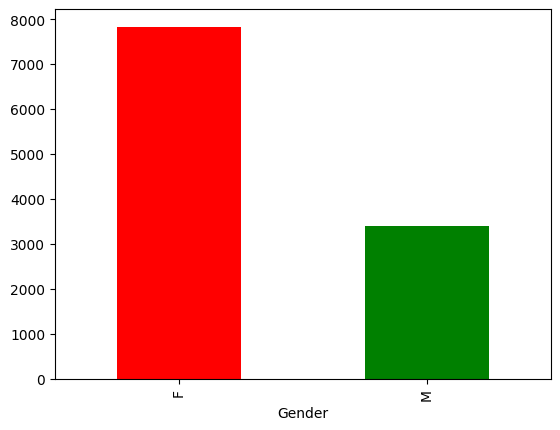

In [52]:
g.plot.bar(color=["red","green"])

In [54]:
mas=data.groupby("Marital_Status")["Marital_Status"].count()
mas

Marital_Status
Married      4721
Unmarried    6518
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status'>

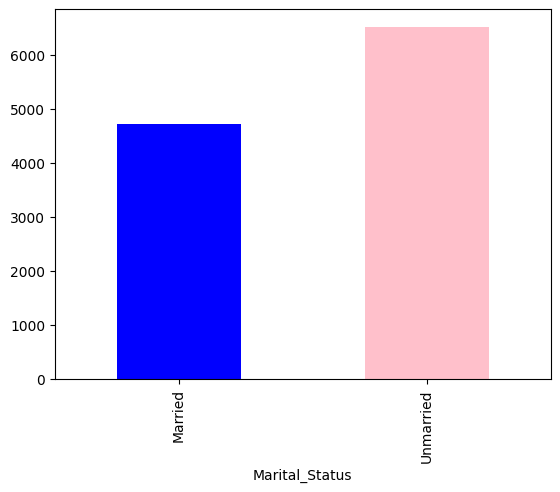

In [56]:
mas.plot.bar(color=["blue","pink"])

In [23]:
data.groupby("State")["State"].count()

State
Andhra Pradesh       811
Bihar                434
Delhi               1104
Gujarat              427
Haryana              452
Himachal Pradesh     608
Jharkhand            380
Karnataka           1304
Kerala               453
Madhya Pradesh       921
Maharashtra         1525
Punjab               200
Rajasthan            231
Telangana            125
Uttar Pradesh       1944
Uttarakhand          320
Name: State, dtype: int64

In [24]:
data.groupby("Zone")["Zone"].count()

Zone
Central     4289
Eastern      814
Northern    1491
Southern    2693
Western     1952
Name: Zone, dtype: int64

In [25]:
data.groupby("Occupation")["Occupation"].count()

Occupation
Agriculture         283
Automobile          565
Aviation           1310
Banking            1137
Chemical            541
Construction        414
Food Processing     423
Govt                854
Healthcare         1408
Hospitality         703
IT Sector          1583
Lawyer              531
Media               637
Retail              501
Textile             349
Name: Occupation, dtype: int64

In [26]:
data.groupby("Orders")["Orders"].count()

Orders
1    2808
2    2893
3    2765
4    2773
Name: Orders, dtype: int64

In [27]:
buy=data[["Gender","Marital_Status","Amount"]].dropna()
buy

,Gender,Marital_Status,Amount
0,F,Unmarried,23952.0
1,F,Married,23934.0
2,F,Married,23924.0
3,M,Unmarried,23912.0
4,M,Married,23877.0
...,...,...,...
11246,M,Married,370.0
11247,M,Unmarried,367.0
11248,F,Unmarried,213.0
11249,M,Unmarried,206.0


In [59]:
df=data.groupby(["Marital_Status","Gender"])["Amount"].sum().unstack()
df

Gender,F,M
Marital_Status,,
Married,30549207.99,13574538.0
Unmarried,43786648.44,18338738.0


<Axes: xlabel='Marital_Status'>

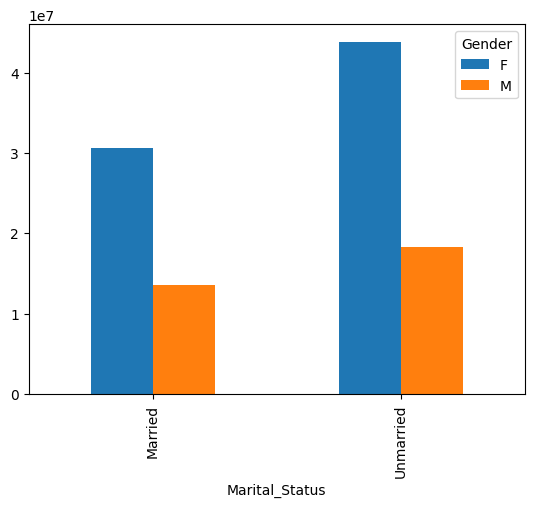

In [60]:
df.plot.bar()

## Which age group people tend to spend more time on shopping 

In [44]:
age=data.groupby("Age Group")["Amount"].sum()
age


Age Group
0-17      2699653.00
18-25    17240732.00
26-35    42613443.94
36-45    22144995.49
46-50     9207844.00
51-55     8261477.00
55+       4080987.00
Name: Amount, dtype: float64

<Axes: xlabel='Age Group'>

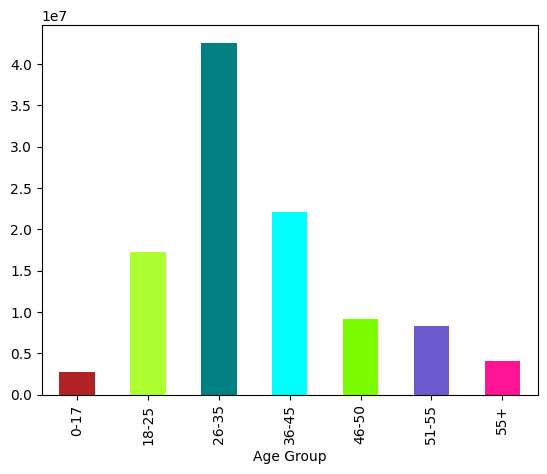

In [61]:
age.plot.bar(color=["firebrick","greenyellow","teal","cyan","lawngreen","slateblue","deeppink"])

## Director of the company wants to know which state should they target for more profit 

In [47]:
state=data.groupby("State")["Amount"].sum().sort_values(ascending=False)
state

State
Uttar Pradesh       19374968.00
Maharashtra         14427543.00
Karnataka           13523540.00
Delhi               11603819.45
Madhya Pradesh       8101142.00
Andhra Pradesh       8037146.99
Himachal Pradesh     4963368.00
Haryana              4220175.00
Bihar                4022757.00
Gujarat              3946082.00
Kerala               3894491.99
Jharkhand            3026456.00
Uttarakhand          2520944.00
Rajasthan            1909409.00
Punjab               1525800.00
Telangana            1151490.00
Name: Amount, dtype: float64

<Axes: xlabel='State'>

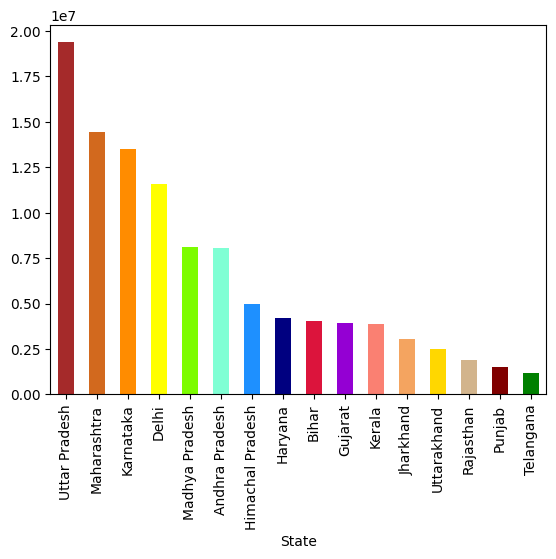

In [64]:
state.plot.bar(color=["brown","chocolate","darkorange","yellow","lawngreen","aquamarine","dodgerblue","navy","crimson","darkviolet","salmon","sandybrown","gold","tan","maroon","green"])

In [49]:
## Top 5 states for orders 
so=data.groupby("State")["Orders"].sum().sort_values(ascending=False).head(5)
so

State
Uttar Pradesh     4807
Maharashtra       3810
Karnataka         3240
Delhi             2740
Madhya Pradesh    2252
Name: Orders, dtype: int64

<Axes: xlabel='State'>

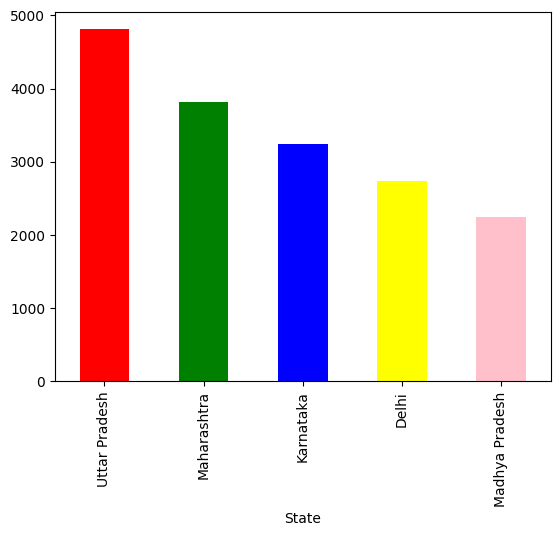

In [65]:
so.plot.bar(color=["red","green","blue","yellow","pink"])

##  Which sector spends more income 

In [68]:
occp=data.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)
occp

Occupation
IT Sector          14755079.00
Healthcare         13034587.49
Aviation           12602298.00
Banking            10770610.95
Govt                8517212.00
Hospitality         6376405.00
Media               6295832.99
Automobile          5368596.00
Chemical            5297436.00
Lawyer              4981665.00
Retail              4783170.00
Food Processing     4070670.00
Construction        3597511.00
Textile             3204972.00
Agriculture         2593087.00
Name: Amount, dtype: float64

<Axes: xlabel='Occupation'>

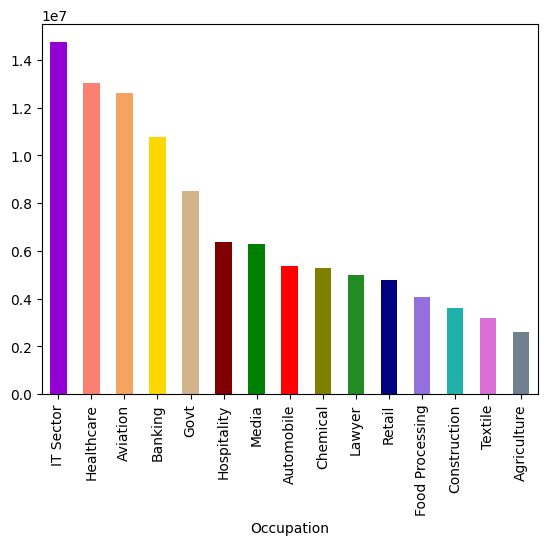

In [70]:
occp.plot.bar(color=["darkviolet","salmon","sandybrown","gold","tan","maroon","green","red","olive","forestgreen","navy","mediumpurple","lightseagreen","orchid","slategray"])

In [71]:
pro=data.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
pro

Product_Category
Food                     33933883.50
Clothing & Apparel       16495019.00
Electronics & Gadgets    15643846.00
Footwear & Shoes         15575209.45
Furniture                 5440051.99
Games & Toys              4331694.00
Sports Products           3635933.00
Beauty                    1959484.00
Auto                      1958609.99
Stationery                1676051.50
Household items           1569337.00
Tupperware                1155642.00
Books                     1061478.00
Decor                      730360.00
Pet Care                   482277.00
Hand & Power Tools         405618.00
Veterinary                 112702.00
Office                      81936.00
Name: Amount, dtype: float64

<Axes: xlabel='Product_Category'>

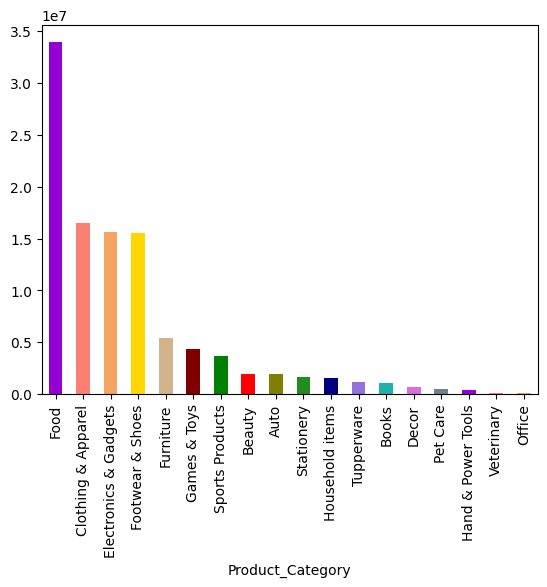

In [72]:
pro.plot.bar(color=["darkviolet","salmon","sandybrown","gold","tan","maroon","green","red","olive","forestgreen","navy","mediumpurple","lightseagreen","orchid","slategray"])

In [73]:
pro=data.groupby("Product_ID")["Orders"].sum().sort_values(ascending=False).head(10)
pro

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00114942     79
P00025442     79
P00117942     76
P00145042     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64

<Axes: xlabel='Product_ID'>

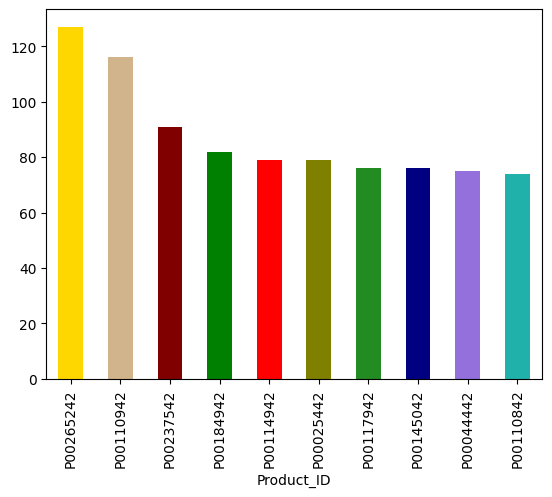

In [75]:
pro.plot.bar(color=["gold","tan","maroon","green","red","olive","forestgreen","navy","mediumpurple","lightseagreen"])

In [87]:
z=data.groupby(["State","Zone"])["Orders"].count().sort_values(ascending=False)
z

State             Zone    
Uttar Pradesh     Central     1944
Maharashtra       Western     1525
Karnataka         Southern    1304
Delhi             Central     1104
Madhya Pradesh    Central      921
Andhra Pradesh    Southern     811
Himachal Pradesh  Northern     608
Kerala            Southern     453
Haryana           Northern     452
Bihar             Eastern      434
Gujarat           Western      427
Jharkhand         Eastern      380
Uttarakhand       Central      320
Rajasthan         Northern     231
Punjab            Northern     200
Telangana         Southern     125
Name: Orders, dtype: int64

<Axes: xlabel='State,Zone'>

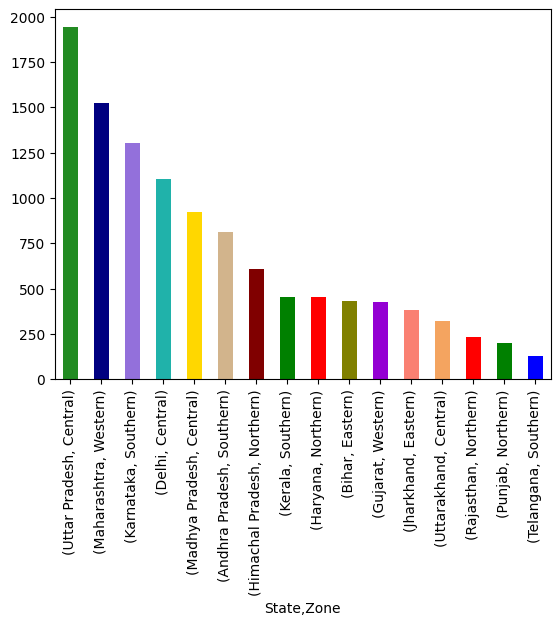

In [89]:
z.plot.bar(color=["forestgreen","navy","mediumpurple","lightseagreen","gold","tan","maroon","green","red","olive","darkviolet","salmon","sandybrown","red","green","blue"])

# Conclusion:- Unmmaried Women between age 26-35 from UP(Central Range), Maharashtra(Wester Range), Karnatka(Southern Range) working in IT, Health and Aviation most likely to choose products from Food, Clothing and Electronic category 